In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
# embeber en los cuadernos interactivos la salida de matplotlib
%matplotlib inline
from scipy.fft import fft

In [2]:
# Método del trapecio
def Integral(f, x_i, x_f):
    n = 100000
    x, h = np.linspace(x_i, x_f, n + 1, retstep = True) #grilla
    return (0.5)*h*f(x[0] + f(x[-1])) + h*np.sum(f(x[1:-1]))

# Tarea 4
#### Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

#### (A) Integrales
$\int_{0}^{1}x^{-1/2}\,\text{d}x$


In [3]:
def f(x):
    return  x**(-0.5)

$\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$

In [4]:
def g(x):
    return  (np.e**(-x))*(np.log(x))
#(0.001, 1000)

$\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

In [5]:
def h(x):
    return  np.sin(x)/x
#(0, 100)

## Resultado: 

In [6]:
print("El resultado de la integral de la función f es:", Integral(f, 0, 1))

El resultado de la integral de la función f es: 1.9953819535566988


In [7]:
print("El resultado de la integral de la función g es:", Integral(g, 0.001, 1000), "aproximadamente")

El resultado de la integral de la función g es: -0.5744849001125716 aproximadamente


In [8]:
print("El resultado de la integral de la función h es:", Integral(h, 0, 100), "aproximadamente")

El resultado de la integral de la función h es: 1.5622279973033653 aproximadamente


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la Tarea 3 (D) en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). 

In [10]:
df = pd.read_pickle(r"ex1.gz")

## Sea la función f(x) 
$$f(x)=\frac{0.94519587}{\left[(x-1.43859817)^2+(0.7390972)\right]^\gamma}$$

Donde 𝛾 = 1.12724243


In [11]:
X = df["x"]
y = df["y"]

def f(x): 
    return (0.94519587)/((x-1.43859817)**2 + 0.7390972)**(1.12724243)

x = f(X)

In [12]:
Nf = 25
a = np.min(x)
b = np.max(x)
def a_j(j):
    global a, b, x, y
    L = b - a
    k_j = 2*np.pi*j/4
    new_y = y*np.cos(k_j*x)/L
    if j > 0:
        new_y = new_y*2
    return sp.integrate.simpson(new_y, x)

def b_j(j):
    global a, b, x, y
    L = b - a
    k_j = 2*np.pi*j/4
    new_y = y*np.sin(k_j*x)/L
    if j > 0:
        new_y = new_y*2
    return sp.integrate.simpson(new_y, x)
   
A_j = np. array([a_j(j) for j in range(Nf)])
B_j = np. array([b_j(j) for j in range(Nf)])
K_j = np. array([2*np.pi*j/4 for j in range(Nf)])

In [13]:
#Tansformada
x_tilde = np.linspace(0, 4, 100000) 
y_tilde = np.sum([(A_j[j]*np.cos(K_j[j]*x_tilde) + B_j[j]*np.sin(K_j[j]*x_tilde)) for j in range(Nf)  ], axis=0)

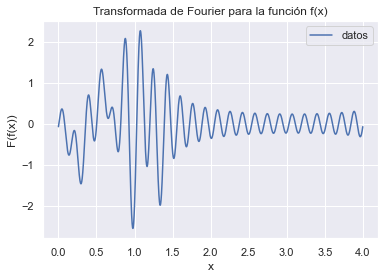

In [14]:
plt.plot(x_tilde,y_tilde, label = "datos")
plt.legend(loc="upper right")
plt.title("Transformada de Fourier para la función f(x)")
plt.ylabel('F(f(x))')
plt.xlabel('x')
plt.show()

Ajuste la transformada de Fourier para los datos de la Tarea 3 usando el método de regresión exacto de la Tarea 3 (C) y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

In [15]:
X = np.array(x_tilde).reshape(-1, 1)
Y = np.array(y_tilde).reshape(-1, 1)

In [16]:
P = np.array([np.ones([len(x_tilde), 1]), X, X**2, X**3, X**4, X**5]).reshape(6, len(x_tilde)).T
coeffs = np.linalg.inv(P.T @ P)@ P.T @ Y

b, c1, c2, c3, c4, c5 = coeffs

In [17]:
Ajuste = b + (c1*X) + (c2*X**2) + (c3*X**3) +  (c4*X**4) + (c5*X**5)

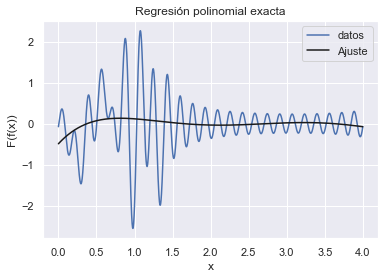

In [18]:
plt.figure()
plt.plot(x_tilde,y_tilde, label = "datos")
plt.plot(X, Ajuste, c ='k', label = "Ajuste")
plt.legend(loc="upper right")
plt.title("Regresión polinomial exacta")
plt.ylabel('F(f(x))')
plt.xlabel('x')
plt.show()

Con el ajuste se puede ver que no la transformada hace que este ajuste esté muy cerca de cero en la mayoria de los valores. 